# Jupyter Notebook for the CNN - Data Analysis

ideas:\
-DONE INDIVIDUAL / COLLABORATION / UNKNOWN [if multiple authors convert to "collaboration" (analyze months with the most colaboration / colaboration throughout the year)]\
-check the most common words in the tile and create a statistic (possibly the most common noun/name)\
-DONE count the number of each date to determine the fluctioation daily published articles\
-DONE sort the index\
-pie chart for authors throughout the time
-progression of single author/collaborations/unknown as 3 curves in one plot
-DONE combine xmls for all months in a loop\
-possibly perform regression for the final month\
...\
-DONE on what day of the week were the articles published\
-make the charts interactive\
\
-PROBLEMS:\
-inconsistent formatting

Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight") # seaborn OR seaborn-darkgrid OR ggplot (fun: fivethirtyeight) (without grid: seaborn-dark)

Converting the previously collected .xml files into a dandas dataframe (one selected month)

In [2]:
df_one_month = pd.read_xml("xml_db/CNN_2021_1.xml")
print(f'{df_one_month.shape=}')

df_one_month.shape=(219, 6)


Reading each month of the year and concatenating them into a single pandas dataframe

In [3]:
df_months = []
for i in range(1,12): # !!!AFTER THE YEAR IS OVER, EXTEND TO: 1-13 (TO INCLUDE DECEMBER)!!!
    df_months.append(pd.read_xml(f"xml_db/CNN_2021_{i}.xml"))
df_orig = pd.concat(df_months)
df_orig.shape

(3107, 6)

In [4]:
df_orig.head(3)

,date,title,url,author,textshort,textfull
0,2021-01-31,Ukraine Fast Facts,https://edition.cnn.com/2014/02/28/world/europ...,CNN Editorial Research,"Here's a look at Ukraine, the second-largest E...","Here's a look at Ukraine, the second-largest E..."
1,2021-01-30,Austrian man leaves fortune to French village ...,https://edition.cnn.com/2021/01/30/europe/fort...,"Eoin McSweeney and Arnaud Siad, CNN",An Austrian man who died in December has left ...,An Austrian man who died in December has left ...
2,2021-01-31,Manchester United star Marcus Rashford raciall...,https://edition.cnn.com/2021/01/31/football/ma...,"Ben Church, CNN",Manchester United forward Marcus Rashford has ...,Manchester United forward Marcus Rashford has ...


Re-shaping the dataframe 

In [5]:
# Removing everything but the meta-information
df = df_orig.loc[:, ["date", "title", "url", "author"]].copy()

# Sorting the dataframe by date (ascending)
df = df.sort_values("date", ascending=True).reset_index(drop=True)
df.head()


,date,title,url,author
0,2021-01-01,Australia has changed its national anthem in a...,https://edition.cnn.com/2021/01/01/australia/a...,"Jessie Yeung, CNN"
1,2021-01-01,2020 was a terrible year for Europe. 2021 is u...,https://edition.cnn.com/2020/12/31/europe/eu-b...,"Luke McGee, CNN"
2,2021-01-01,Leeds United owner Andrea Radrizzani defends c...,https://edition.cnn.com/2020/12/30/football/ka...,"Ben Church, CNN"
3,2021-01-01,Manchester United draw level with Liverpool as...,https://edition.cnn.com/2021/01/01/football/pr...,"Paul Gittings, CNN"
4,2021-01-02,Mauricio Pochettino takes charge at French pow...,https://edition.cnn.com/2021/01/02/football/pa...,"Paul Gittings, CNN"


Processing the re-shaped dataframe

In [6]:
# import pandas_profiling as pp
# possibly work with this later

# Publications by Date

In [7]:
publications = df.date.value_counts().sort_index().copy()
publications.head()

2021-01-01     4
2021-01-02     5
2021-01-03     7
2021-01-04     5
2021-01-05    10
Name: date, dtype: int64

Text(0, 0.5, 'Nr. of published articles')

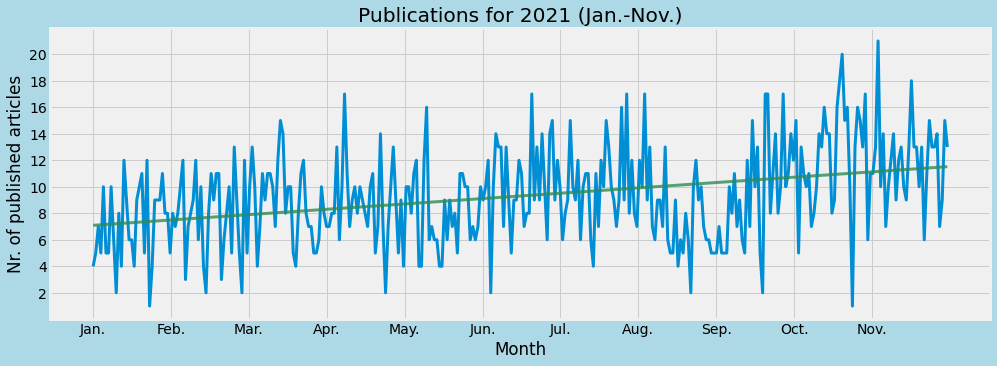

In [8]:
#Ideas:
#possibly switch from making individual series to pulling from a dataframe (this is likely more elegant)

# List of months
m = ["Jan.", "Feb.", "Mar.", "Apr.", "May.", "Jun.", "Jul.", "Aug.", "Sep.", "Oct.", "Nov."]

# Initiating the plot 
fig_pub_year, ax_pub_year = plt.subplots()

# Feeding the data
publications.plot(x=publications.index, y=publications.values, title=f"Publications for 2021 ({m[0]}-{m[-1]})", kind="line", figsize=(15,5),
alpha=1, linewidth=3)

# Generating the trend line
z = np.polyfit([i[0] for i in enumerate(publications.values)], publications.values, 1)
p = np.poly1d(z)
ax_pub_year.plot([i[0] for i in enumerate(publications.values)], p([i[0] for i in enumerate(publications.values)]), linewidth=3, c="seagreen",
                    alpha=0.8)

# Configurating the chart
fig_pub_year.set_facecolor('lightblue') # outer
#ax_pub_year.set_facecolor('lightgrey') # inner
#xmin, xmax = ax_test.get_xlim() # -16.650000000000002 349.65
#custom_ticks = np.linspace(0, xmax+xmin, len(m), dtype=int)
#ax_test.set_xticks(custom_ticks)
#ticks = ax_pub_year.get_xticks()

ax_pub_year.set_xticks(np.arange(0,len(publications), step=len(publications)/11))
ax_pub_year.set_xticklabels(m, rotation=0, ha="center")
ax_pub_year.set_yticks(np.arange(0,np.max(publications)+1, step=2)[1:])
ax_pub_year.set_xlabel("Month")
ax_pub_year.set_ylabel("Nr. of published articles")

#d = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]
#dd = [np.sum(d[:i]) for i in range(len(d))]
#for xc in dd:
    #ax_pub_year.axvline(x=xc, c="r")

# Publication plot for one month

In [9]:
publications_one_month = df_one_month.date.value_counts().sort_index().copy()
publications_one_month.head()

2021-01-01     4
2021-01-02     5
2021-01-03     7
2021-01-04     5
2021-01-05    10
Name: date, dtype: int64

Text(0, 0.5, 'Nr. of published articles')

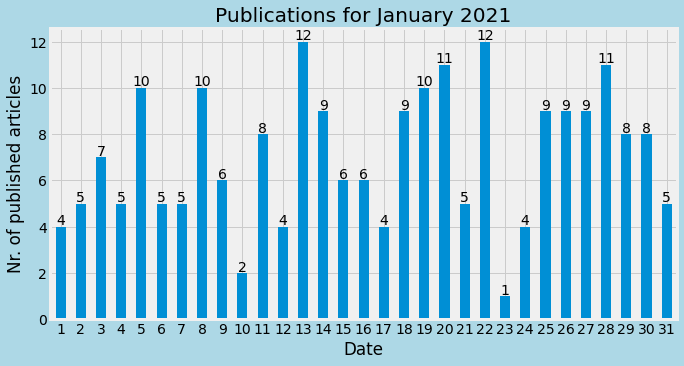

In [10]:
# Initiating the plot
fig_pub, ax_pub = plt.subplots()

# Feeding the data (pandas Series)
publications_one_month.plot(kind="bar", title="Publications for January 2021", figsize=(10,5), alpha=1, linewidth=2, edgecolor=None)

# Annotating individual bars
for bar in ax_pub.patches:
    ax_pub.annotate(bar.get_height(),(bar.get_x()+bar.get_width()/2, bar.get_height()),
    xytext=(0, 6), textcoords="offset points", ha="center", va="center")

# Configuring the chart
fig_pub.set_facecolor('lightblue') # outer
#ax_pub.set_facecolor('lightgrey') # inner
ax_pub.set_xticks(np.arange(len(publications_one_month))) # custom ticks 1/2
ax_pub.set_xticklabels(np.arange(1, len(publications_one_month)+1), rotation=0) # custom ticks 2/2
ax_pub.set_xlabel("Date")
ax_pub.set_ylabel("Nr. of published articles")

# Publications by Weekday

In [11]:
weekdays_pub = publications.copy()
weekdays_pub.head(3)

2021-01-01    4
2021-01-02    5
2021-01-03    7
Name: date, dtype: int64

In [12]:
# List of weekdays
week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Converting the list of weekdays to get: 1st of January, 2021 as Friday
start_day = lambda day : week[week.index(day):] + week[:week.index(day)] if week.index(day) else None
week = start_day("Friday")

# Generating a list of weekdays with the lenght of pandas.Series index
weekdays = []
i = 0
j = 0
while i < len(weekdays_pub.index):
    if j == len(week):
        j = 0
    weekdays.append(week[j])
    i += 1
    j += 1

weekdays_pub.index = weekdays
weekdays_pub = weekdays_pub.groupby(weekdays_pub.index).sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
weekdays_pub    

Monday       511
Tuesday      524
Wednesday    492
Thursday     460
Friday       494
Saturday     326
Sunday       300
Name: date, dtype: int64

Text(0, 0.5, 'Nr. of articles published')

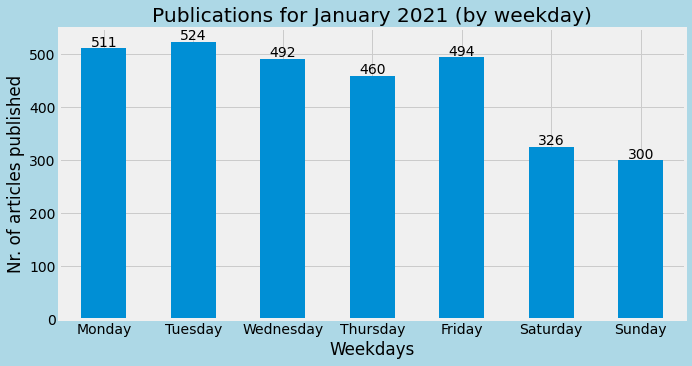

In [13]:
# Inititating the plot
fig_days, ax_days = plt.subplots()

# Feeding the data (pandas Series)
weekdays_pub.plot(kind="bar", title="Publications for January 2021 (by weekday)", figsize=(10,5))

# Annotating individual bars
for bar in ax_days.patches:
    ax_days.annotate(bar.get_height(), (bar.get_x() + bar.get_width()/2, bar.get_height()),
    xytext=(0,6), textcoords="offset points", ha="center", va="center")

# Configuring the chart
fig_days.set_facecolor("lightblue")
ax_days.set_xticklabels(labels=weekdays_pub.index, rotation=0)
ax_days.set_xlabel("Weekdays")
ax_days.set_ylabel("Nr. of articles published")


# Publications by Author / Collaboration / Unknown 

In [32]:
authors = df.author.copy()
authors.head()

0     Jessie Yeung, CNN
1       Luke McGee, CNN
2       Ben Church, CNN
3    Paul Gittings, CNN
4    Paul Gittings, CNN
Name: author, dtype: object

In [33]:
# Storing the samples in the corresponding list to be insplected (if needed)
single = [] # single author
collab = [] # collaboration of multiple authors on the "contents" of the articel (excluding production of complementary photos, videos, etc.)
unknown = [] # no author names are provided

# Special cases (these are rare instances that are not covered by the implemented rules)
special_single = ["Jack Bantock. CNN", "John Sinnott CNN"]

for index, value in authors.items():
    s = value.split(',')
    if value in special_single:
        single.append(value)
        authors.iloc[index] = "Single author"
    elif " and " in value or "&" in value: # all cases with and (including collabs of "CNN & Reuters")
        collab.append(value)
        authors.iloc[index] = "Collaboration"
    elif len(s) == 1 and "cnn" in s[0].lower(): # cnn; cnn editorial research
        unknown.append(value)
        authors.iloc[index] = "Unknown"
    elif len(s) == 1 and " " in s[0]: # author (will also falsely include company names of multiple words BUT none have been observed so far)
        single.append(value)
        authors.iloc[index] = "Single author"
    elif len(s) == 2 and "cnn" in s[-1].lower(): # author, cnn
        single.append(value)
        authors.iloc[index] = "Single author"
    elif len(s) >= 2: # author, author (,author, etc.) OR author, author (,author, etc.), cnn
        collab.append(value)
        authors.iloc[index] = "Collaboration"
    else:
        unknown.append(value) # Reuters
        authors.iloc[index] = "Unknown"

print(f'Total count of processed elements: {np.sum([len(single), len(collab), len(unknown)])}')

authors = authors.value_counts()
authors


Total count of processed elements: 3107


Single author    1804
Collaboration     961
Unknown           342
Name: author, dtype: int64

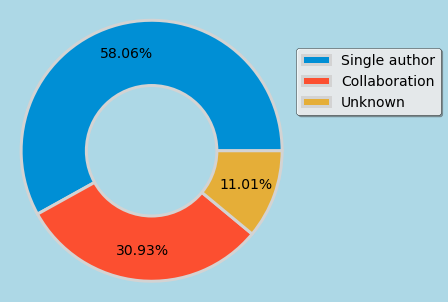

In [20]:
# Initiating the plot
fig_authors, ax_authors = plt.subplots()

# Feeding the data (pandas Series)
authors.plot(kind="pie", labels=None, radius=1, wedgeprops = {"linewidth": 3, "edgecolor" : "lightgrey"},
                            autopct="%.2f%%", pctdistance=0.77, shadow=False, startangle=0, figsize=(4,4))

# Creating adoughnut chart
circle = plt.Circle((0,0), 0.5, facecolor="lightblue", edgecolor="lightgrey", linewidth=3, fill=True)
p = plt.gcf()
p.gca().add_artist(circle)

# Configuring the chart
fig_authors.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
ax_authors.axis('equal')
ax_authors.margins(0.05, 0.05)

fig_authors.set_facecolor("lightblue")
ax_authors.axis('off')
ax_authors.legend(labels=authors.index, loc='lower left', bbox_to_anchor=(0.98, 0.6, 0.5, 1.5), title=None,
                    facecolor="white", edgecolor="black", fancybox=True, shadow=True, borderpad=None, framealpha=0.8)

#ax_authors.set_title("Distribution of authors", loc="center", fontdict={"color":"black"})
# 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left',
# 'center right', 'lower center', 'upper center', 'center'

# possibly labels=np.round((authors.values / np.sum(authors.values) * 100), 2), labeldistance=0.5,

In [21]:
test_series = pd.Series(unknown)
#len(test_series.value_counts())
test = test_series.value_counts(normalize=True)
test

Reuters                   0.681287
CNN Editorial Research    0.181287
CNN                       0.096491
CNN Sports staff          0.017544
CNN staff                 0.008772
CNN Sport staff           0.008772
CNN Sport Staff           0.005848
dtype: float64

<AxesSubplot:>

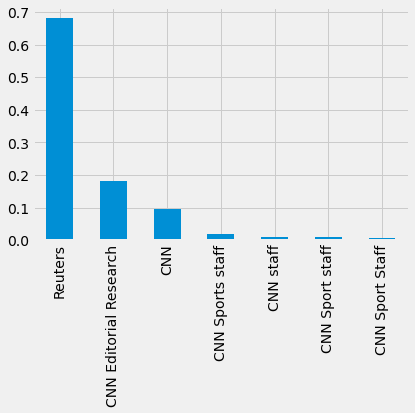

In [22]:
test.plot(kind="bar")

In [65]:
print(("\n").join(unknown))

CNN
CNN Editorial Research
Reuters
CNN Editorial Research
CNN Editorial Research
CNN
CNN
Reuters
CNN Editorial Research
CNN Editorial Research
Reuters
Reuters
Reuters
Reuters
CNN Editorial Research
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
CNN
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
CNN Editorial Research
Reuters
CNN Editorial Research
Reuters
CNN Editorial Research
CNN
Reuters
CNN
Reuters
Reuters
Reuters
CNN Editorial Research
Reuters
CNN
Reuters
Reuters
CNN Editorial Research
Reuters
Reuters
Reuters
CNN Editorial Research
Reuters
Reuters
CNN
Reuters
Reuters
Reuters
CNN Editorial Research
Reuters
CNN
CNN Editorial Research
Reuters
Reuters
Reuters
CNN Editorial Research
CNN Editorial Research
Reuters
Reuters
Reuters
CNN
CNN
Reuters
CNN
Reuters
CNN Editorial Research
CNN Editorial Research
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Reuters
Re